<a href="https://colab.research.google.com/github/pralaksh/INSE6220/blob/main/Pralaksh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install pycaret==2.3.6

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/pralaksh/INSE6220/main/Vehicledata1.csv')
df.head(25)

,Type,Wheel Base,Length,Breadth,Height,Curb Weight,Compression Ratio
0,1,88.6,168.8,64.1,48.8,2548,9.00
1,4,94.5,171.2,65.5,52.4,2823,9.00
2,2,99.8,176.6,66.2,54.3,2337,10.00
3,2,99.4,176.6,66.4,54.3,2824,8.00
4,2,99.8,177.3,66.3,53.1,2507,8.50
5,2,105.8,192.7,71.4,55.7,2844,8.50
6,3,105.8,192.7,71.4,55.7,2954,8.50
7,2,105.8,192.7,71.4,55.9,3086,8.30
8,4,99.5,178.2,67.9,52.0,3053,7.00
9,2,101.2,176.8,64.8,54.3,2395,8.80


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               49 non-null     int64  
 1   Wheel Base         49 non-null     float64
 2   Length             49 non-null     float64
 3   Breadth            49 non-null     float64
 4   Height             49 non-null     float64
 5   Curb Weight        49 non-null     int64  
 6   Compression Ratio  49 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.8 KB


In [14]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [15]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


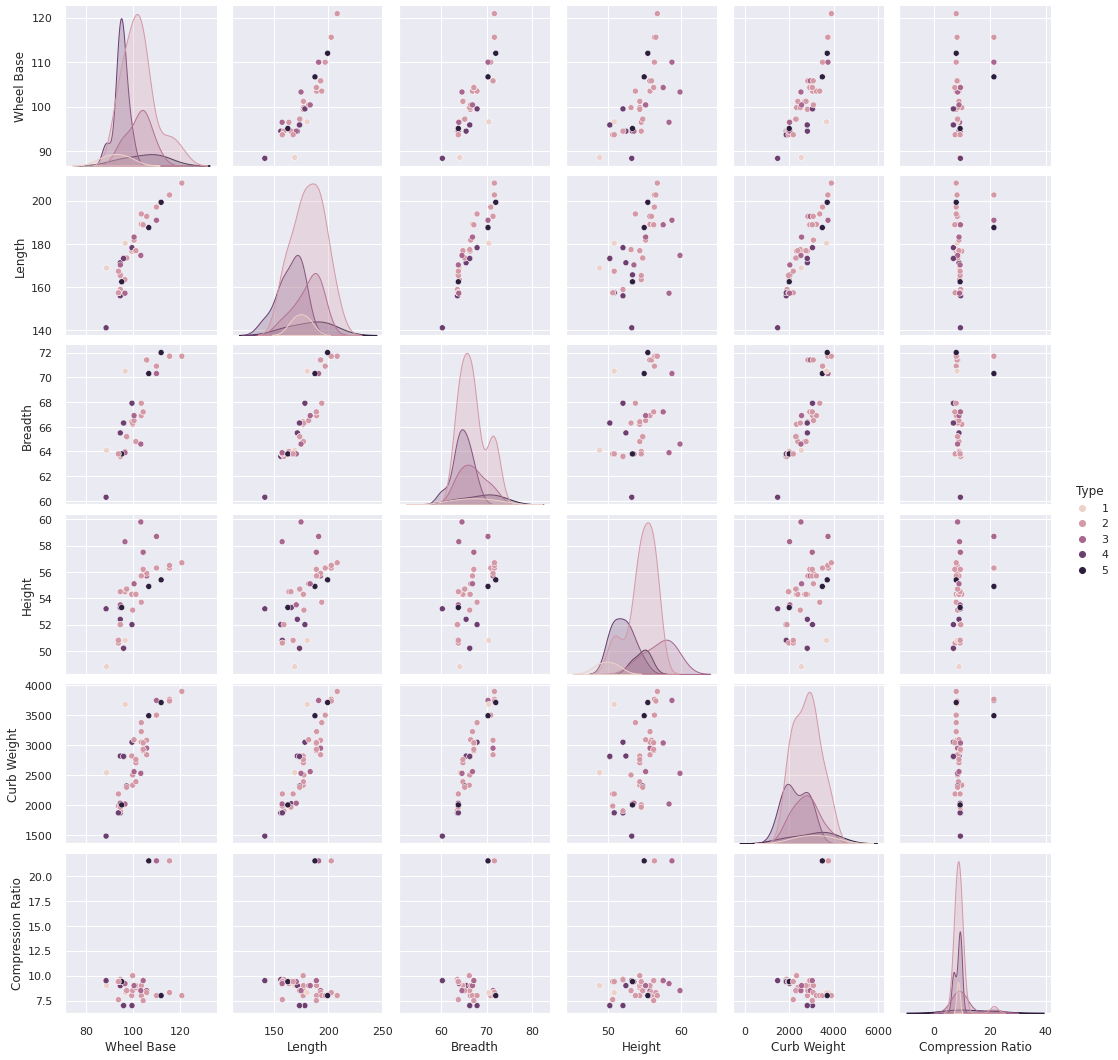

In [102]:
sns.pairplot(df, hue='Type')
plt.show()

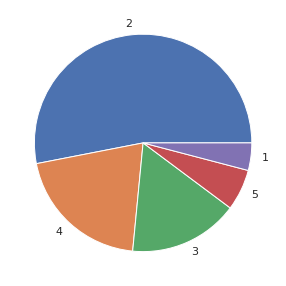

In [16]:
y =df['Type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [17]:
X = df.drop(columns=['Type'])
X.head(10)

,Wheel Base,Length,Breadth,Height,Curb Weight,Compression Ratio
0,88.6,168.8,64.1,48.8,2548,9.0
1,94.5,171.2,65.5,52.4,2823,9.0
2,99.8,176.6,66.2,54.3,2337,10.0
3,99.4,176.6,66.4,54.3,2824,8.0
4,99.8,177.3,66.3,53.1,2507,8.5
5,105.8,192.7,71.4,55.7,2844,8.5
6,105.8,192.7,71.4,55.7,2954,8.5
7,105.8,192.7,71.4,55.9,3086,8.3
8,99.5,178.2,67.9,52.0,3053,7.0
9,101.2,176.8,64.8,54.3,2395,8.8


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wheel Base,49.0,100.608163,6.913870,88.4,94.5,99.8,104.3,120.9
Length,49.0,177.757143,14.793425,141.1,167.3,176.8,188.8,208.1
Breadth,49.0,66.579592,2.925105,60.3,63.9,66.3,67.9,72.0
Height,49.0,54.232653,2.476253,48.8,52.4,54.5,55.9,59.8
Curb Weight,49.0,2713.448980,621.785469,1488.0,2191.0,2811.0,3055.0,3900.0
Compression Ratio,49.0,9.522653,3.178453,7.0,8.3,9.0,9.4,21.5


In [19]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Wheel Base,Length,Breadth,Height,Curb Weight,Compression Ratio
0,-1.754821,-0.611756,-0.856478,-2.216636,-0.268844,-0.166140
1,-0.892620,-0.447840,-0.372903,-0.747761,0.178014,-0.166140
2,-0.118101,-0.079031,-0.131115,0.027479,-0.611706,0.151739
3,-0.176556,-0.079031,-0.062033,0.027479,0.179639,-0.484019
4,-0.118101,-0.031222,-0.096574,-0.462146,-0.335467,-0.325080
5,0.758712,1.020569,1.665021,0.598708,0.212137,-0.325080
6,0.758712,1.020569,1.665021,0.598708,0.390881,-0.325080
7,0.758712,1.020569,1.665021,0.680312,0.605372,-0.388656
8,-0.161942,0.030246,0.456083,-0.910969,0.551749,-0.801898
9,0.086488,-0.065371,-0.614690,0.027479,-0.517460,-0.229716


In [20]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wheel Base,49.0,-1.395709e-15,1.010363,-1.784048,-0.892620,-0.118101,0.539509,2.965361
Length,49.0,1.363988e-15,1.010363,-2.503614,-0.714203,-0.065371,0.754206,2.072360
Breadth,49.0,5.415169e-16,1.010363,-2.169039,-0.925560,-0.096574,0.456083,1.872267
Height,49.0,3.079170e-15,1.010363,-2.216636,-0.747761,0.109083,0.680312,2.271594
Curb Weight,49.0,1.903239e-16,1.010363,-1.991279,-0.848947,0.158514,0.554999,1.928072
Compression Ratio,49.0,-1.699321e-16,1.010363,-0.801898,-0.388656,-0.166140,-0.038989,3.807346


In [21]:
observations = list(df.index)
variables = list(df.columns)

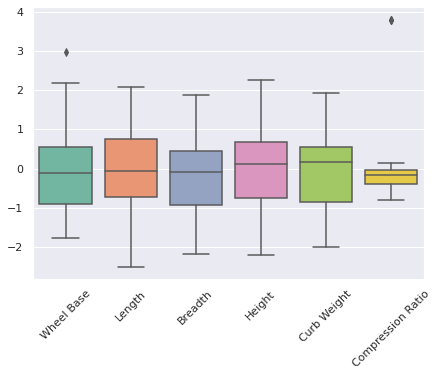

In [22]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

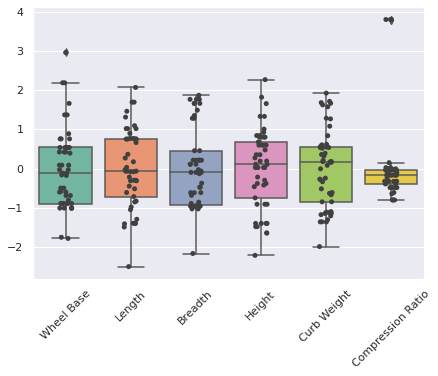

In [23]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

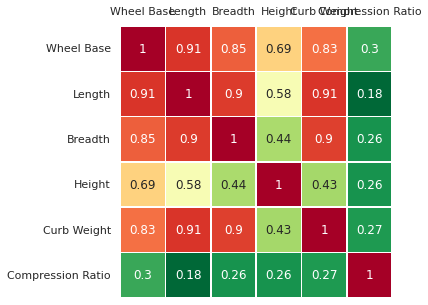

In [24]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

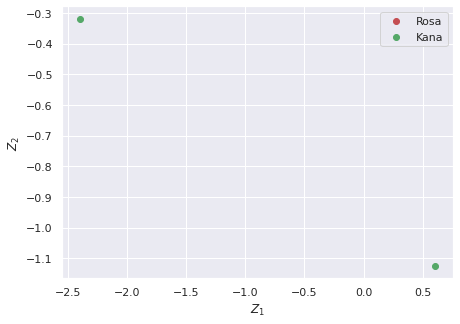

In [25]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

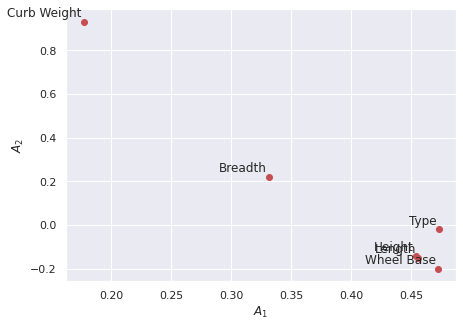

In [26]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


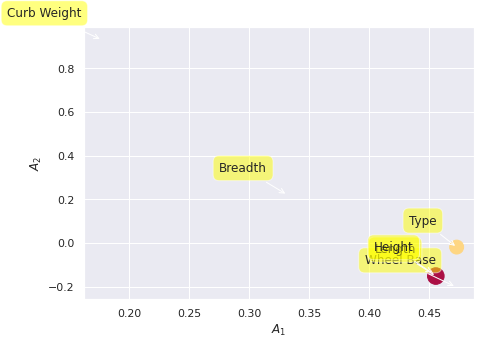

In [27]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

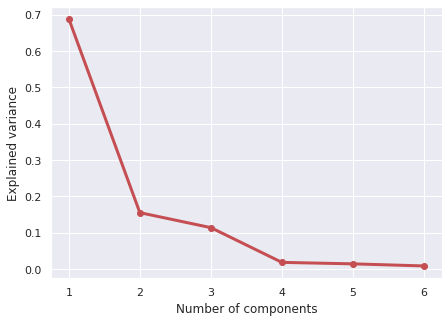

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

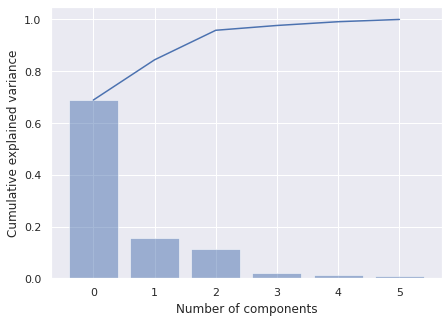

In [29]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [30]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=815c0f5f10b5f1157f42cb049fc1c2b20dada3989596286d7703d7ce37e2c298
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [32]:
out['PC']

,PC1,PC2,PC3
0,-2.393847,-0.318705,-1.703399
1,-0.999470,-0.180901,-0.630772
2,-0.394203,0.272360,0.192493
3,-0.144047,-0.441304,0.110420
4,-0.477254,-0.333878,-0.175723
5,1.835338,-0.674189,0.124789
6,1.916377,-0.699567,0.069260
7,2.029419,-0.771184,0.090701
8,-0.048155,-1.098565,-0.851931
9,-0.535968,-0.029333,0.440680


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f9320a2d0>)

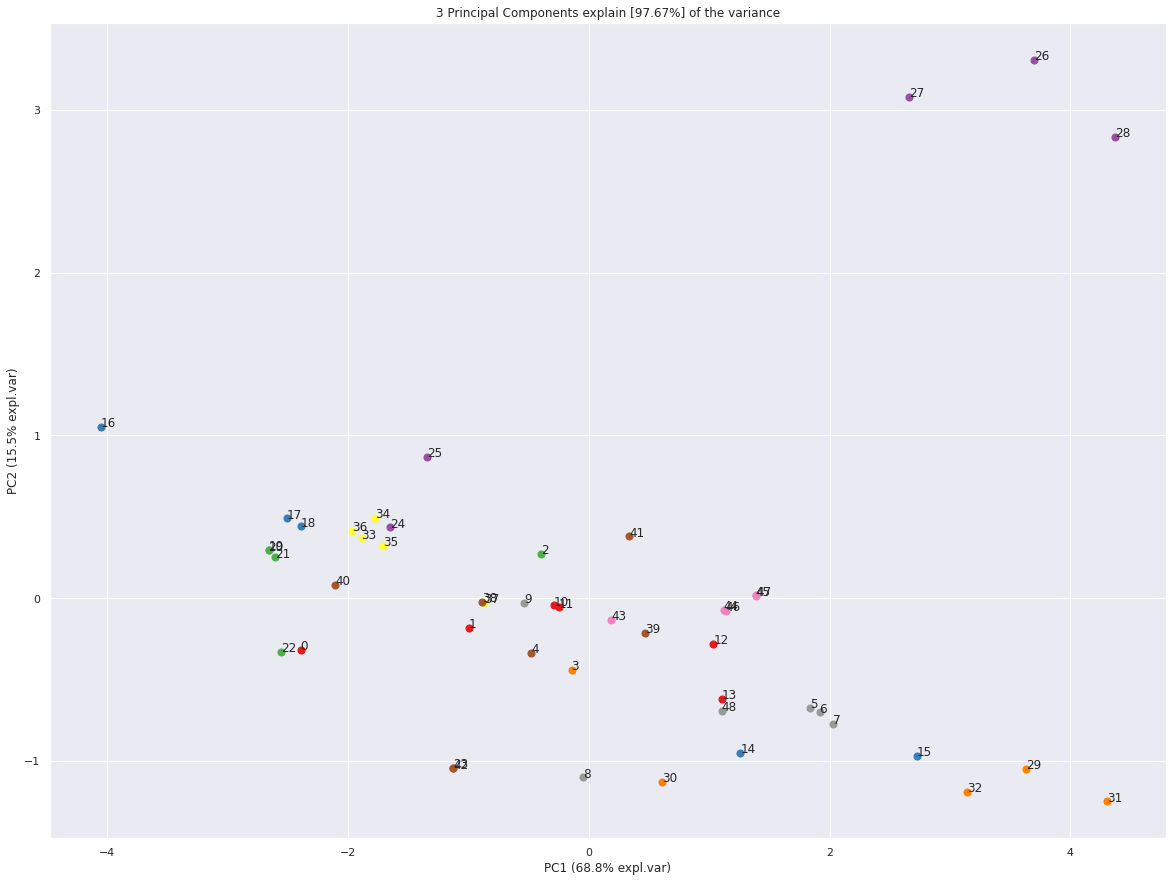

In [33]:
model.scatter(label=True, legend=False)

In [34]:
A = out['loadings'].T

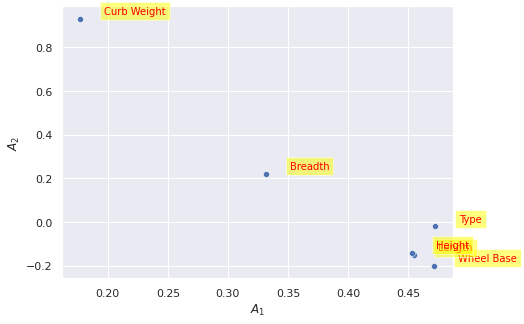

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

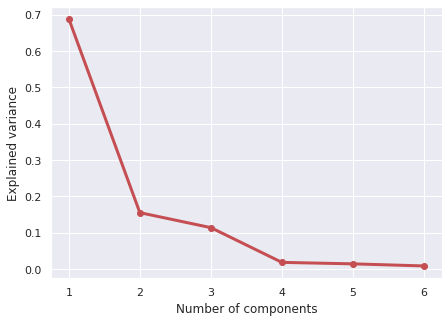

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

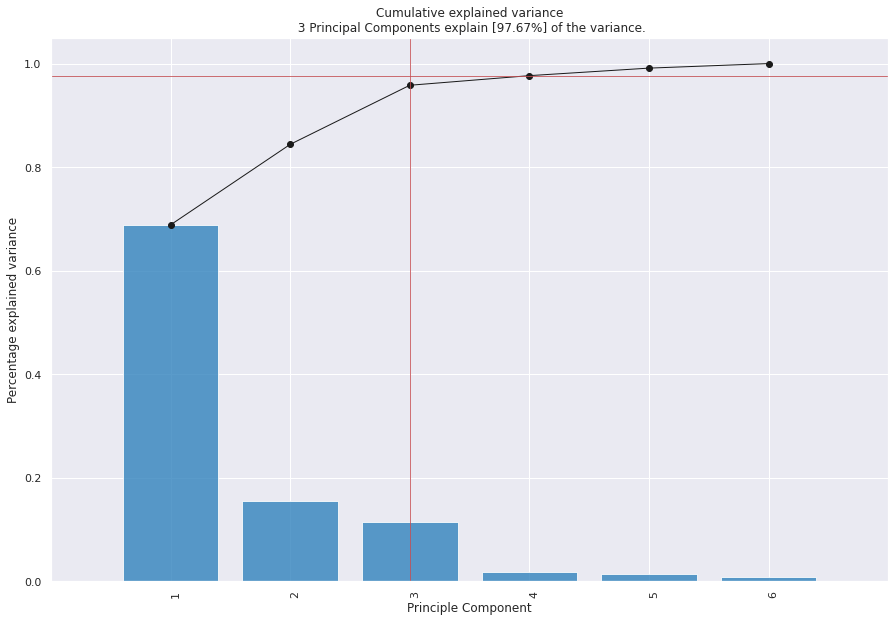

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


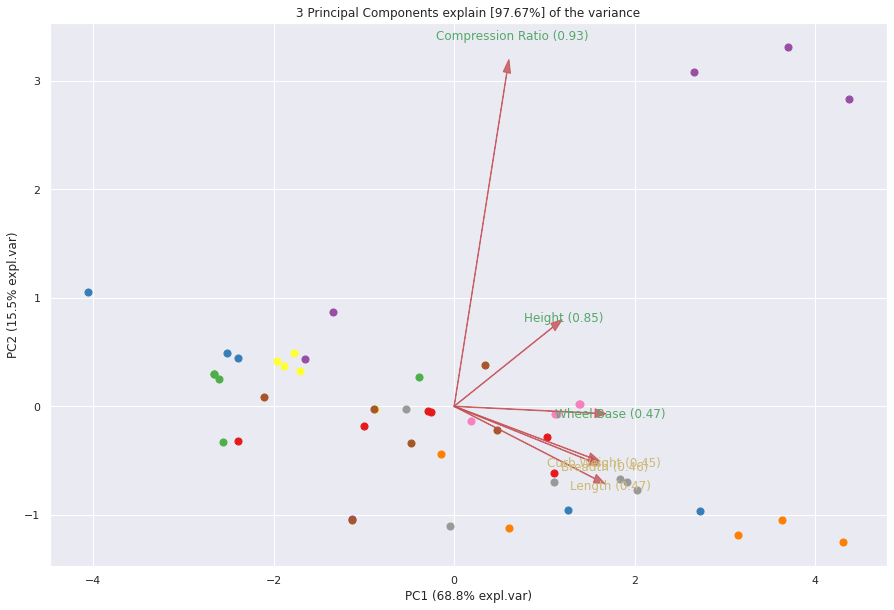

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8f92ed2e50>)

In [38]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


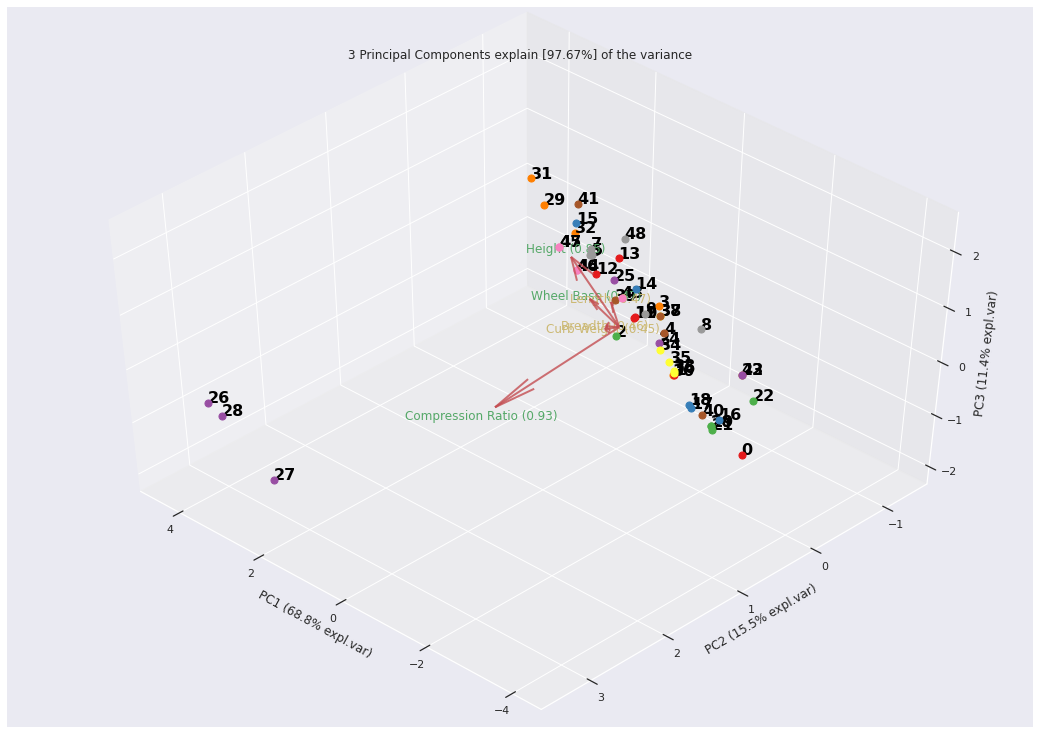

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f8f92db4b50>)

In [39]:
model.biplot3d(legend=False)

In [58]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [59]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (44, 7)
Unseen Data For Predictions: (5, 7)


In [60]:
from pycaret.classification import *
clf = setup(data=data, target='Type', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(44, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [64]:
best_model = compare_models()

""


In [54]:
top5 = compare_models(n_select = 5)

""
